In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df = pd.read_csv("3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv")
df.head()

,Fiscal Year Released,Recidivism Reporting Year,Main Supervising District,Release Type,Race - Ethnicity,Age At Release,Sex,Offense Classification,Offense Type,Offense Subtype,Return to Prison,Days to Return,Recidivism Type,New Offense Classification,New Offense Type,New Offense Sub Type,Target Population
0,2010,2013,7JD,Parole,Black - Non-Hispanic,25-34,Male,C Felony,Violent,Robbery,Yes,433.0,New,C Felony,Drug,Trafficking,Yes
1,2010,2013,NaN,Discharged – End of Sentence,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,Yes,453.0,Tech,NaN,NaN,NaN,No
2,2010,2013,5JD,Parole,White - Non-Hispanic,35-44,Male,B Felony,Drug,Trafficking,Yes,832.0,Tech,NaN,NaN,NaN,Yes
3,2010,2013,6JD,Parole,White - Non-Hispanic,25-34,Male,B Felony,Other,Other Criminal,No,NaN,No Recidivism,NaN,NaN,NaN,Yes
4,2010,2013,NaN,Discharged – End of Sentence,Black - Non-Hispanic,35-44,Male,D Felony,Violent,Assault,Yes,116.0,Tech,NaN,NaN,NaN,No


In [3]:
# Get a list of column names
list(df.columns)

['Fiscal Year Released',
 'Recidivism Reporting Year',
 'Main Supervising District',
 'Release Type',
 'Race - Ethnicity',
 'Age At Release ',
 'Sex',
 'Offense Classification',
 'Offense Type',
 'Offense Subtype',
 'Return to Prison',
 'Days to Return',
 'Recidivism Type',
 'New Offense Classification',
 'New Offense Type',
 'New Offense Sub Type',
 'Target Population']

In [4]:
# Create new df dropping columns that are not going to be used
clean_df = df.drop(columns = ['Recidivism Reporting Year', 'Main Supervising District', 'Race - Ethnicity', 'Days to Return', 
                    'Recidivism Type', 'New Offense Classification', 'New Offense Type', 'New Offense Sub Type', 
                    'Target Population'])
clean_df.head()

,Fiscal Year Released,Release Type,Age At Release,Sex,Offense Classification,Offense Type,Offense Subtype,Return to Prison
0,2010,Parole,25-34,Male,C Felony,Violent,Robbery,Yes
1,2010,Discharged – End of Sentence,25-34,Male,D Felony,Property,Theft,Yes
2,2010,Parole,35-44,Male,B Felony,Drug,Trafficking,Yes
3,2010,Parole,25-34,Male,B Felony,Other,Other Criminal,No
4,2010,Discharged – End of Sentence,35-44,Male,D Felony,Violent,Assault,Yes


In [5]:
# Change column names to be more usable
clean_df = clean_df.rename(columns={"Fiscal Year Released": "year", "Release Type": "release", "Age At Release ": "age", 
                                    "Sex": "sex", "Offense Classification": "classification", "Offense Type": "type", 
                                    "Offense Subtype": "subtype", "Return to Prison": "reoffend"})
clean_df.head()

,year,release,age,sex,classification,type,subtype,reoffend
0,2010,Parole,25-34,Male,C Felony,Violent,Robbery,Yes
1,2010,Discharged – End of Sentence,25-34,Male,D Felony,Property,Theft,Yes
2,2010,Parole,35-44,Male,B Felony,Drug,Trafficking,Yes
3,2010,Parole,25-34,Male,B Felony,Other,Other Criminal,No
4,2010,Discharged – End of Sentence,35-44,Male,D Felony,Violent,Assault,Yes


In [6]:
# Look at unique values for columns
clean_df.release.unique()

array(['Parole', 'Discharged – End of Sentence', 'Special Sentence', nan,
       'Interstate Compact Parole', 'Parole Granted',
       'Discharged - Expiration of Sentence',
       'Paroled w/Immediate Discharge', 'Paroled to Detainer - Iowa',
       'Paroled to Detainer - U.S. Marshall',
       'Paroled to Detainer - Out of State',
       'Released to Special Sentence', 'Paroled to Detainer - INS'],
      dtype=object)

In [7]:
# Look at unique values for columns
clean_df.classification.unique()

array(['C Felony', 'D Felony', 'B Felony', 'Felony - Enhanced',
       'Aggravated Misdemeanor', 'Other Felony (Old Code)',
       'Serious Misdemeanor', 'Sexual Predator Community Supervision',
       'Simple Misdemeanor', 'Felony - Enhancement to Original Penalty',
       'Special Sentence 2005', 'Felony - Mandatory Minimum',
       'Other Felony', 'A Felony', 'Other Misdemeanor'], dtype=object)

In [8]:
# The way records were kept changed over time. Combine values that are the same but labeled differently.
clean_df2 = clean_df.replace({'release': {'Discharged – End of Sentence': 'Discharged - Expiration of Sentence', 
                                          'Parole': 'Parole Granted', 'Special Sentence': 'Released to Special Sentence'}})

clean_df2 = clean_df2.replace({'classification': {'Other Felony (Old Code)': 'Other Felony'}})

# Replace nan with Unknown
clean_df2['release'].fillna('Unknown', inplace=True)

Text(0.5, 1.0, 'Number of Observations by Sex')

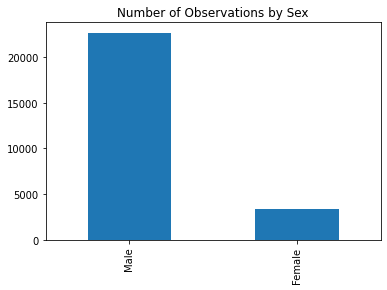

In [9]:
clean_df2.sex.value_counts().plot(kind="bar")
plt.title("Number of Observations by Sex")

Text(0.5, 1.0, 'Number of Observations by Age Group')

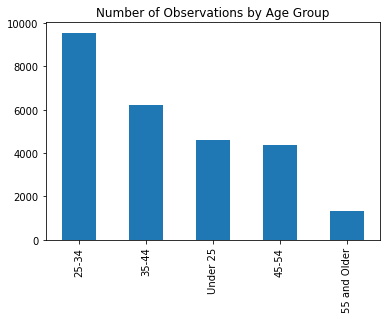

In [10]:
clean_df2.age.value_counts().plot(kind="bar")
plt.title("Number of Observations by Age Group")

In [11]:
# Look to see how many nans are left and replace them with mode values
clean_df2.isna().sum()

# Replace nan in sex with mode
clean_df2['sex'].fillna('Male', inplace=True)

# Replace nan in age with mode
clean_df2['age'].fillna('25-34', inplace=True)

In [12]:
# Create binary target vector indicating if class 0
clean_df2['reoffend'] = clean_df2['reoffend'].replace({"Yes": 0, "No": 1})
clean_df2.head()

,year,release,age,sex,classification,type,subtype,reoffend
0,2010,Parole Granted,25-34,Male,C Felony,Violent,Robbery,0
1,2010,Discharged - Expiration of Sentence,25-34,Male,D Felony,Property,Theft,0
2,2010,Parole Granted,35-44,Male,B Felony,Drug,Trafficking,0
3,2010,Parole Granted,25-34,Male,B Felony,Other,Other Criminal,1
4,2010,Discharged - Expiration of Sentence,35-44,Male,D Felony,Violent,Assault,0


In [13]:
# Write cleaned up dataframe to excel file
clean_df2.to_excel("recidivism_cleaned.xlsx")

In [14]:
# Change categorical features to numerical values
#categorical data
categorical_cols = ['release', 'age', 'sex', 'classification', 'type', 'subtype'] 

# Use get dummies to one-hot encode the categorical columns
clean_df3 = pd.get_dummies(clean_df2, columns = categorical_cols)
clean_df3

,year,reoffend,release_Discharged - Expiration of Sentence,release_Interstate Compact Parole,release_Parole Granted,release_Paroled to Detainer - INS,release_Paroled to Detainer - Iowa,release_Paroled to Detainer - Out of State,release_Paroled to Detainer - U.S. Marshall,release_Paroled w/Immediate Discharge,...,subtype_Robbery,subtype_Sex,subtype_Sex Offender Registry/Residency,subtype_Special Sentence Revocation,subtype_Stolen Property,subtype_Theft,subtype_Traffic,subtype_Trafficking,subtype_Vandalism,subtype_Weapons
0,2010,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2010,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2010,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2010,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26016,2015,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
26017,2015,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26018,2015,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [15]:
# Move the reoffend column to the last column
clean_df4 = clean_df3[[c for c in clean_df3 if c not in ['reoffend']] 
       + ['reoffend']]
clean_df4

,year,release_Discharged - Expiration of Sentence,release_Interstate Compact Parole,release_Parole Granted,release_Paroled to Detainer - INS,release_Paroled to Detainer - Iowa,release_Paroled to Detainer - Out of State,release_Paroled to Detainer - U.S. Marshall,release_Paroled w/Immediate Discharge,release_Released to Special Sentence,...,subtype_Sex,subtype_Sex Offender Registry/Residency,subtype_Special Sentence Revocation,subtype_Stolen Property,subtype_Theft,subtype_Traffic,subtype_Trafficking,subtype_Vandalism,subtype_Weapons,reoffend
0,2010,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2010,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2010,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2010,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26016,2015,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
26017,2015,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
26018,2015,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [16]:
# Split data into features and target data
features = clean_df4.iloc[: , :-1]
target = clean_df4.iloc[:,-1:]

In [17]:
# Use RandomForestClassifier for feature selection because the dataset contains both numeric and categorical features
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Specify random forest instance, indicating the number of trees
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))

# Use selectFromModel object to automatically select features
sel.fit(features, target.values.ravel())

# Make a list and count the selected features
selected_feat= features.columns[(sel.get_support())]

print("Best Number of Features: ", len(selected_feat))
print("List of Feature Names: ", selected_feat)

Best Number of Features:  16
List of Feature Names:  Index(['year', 'release_Discharged - Expiration of Sentence',
       'release_Parole Granted', 'release_Released to Special Sentence',
       'release_Unknown', 'age_25-34', 'age_35-44', 'age_45-54',
       'age_55 and Older', 'age_Under 25', 'sex_Female', 'sex_Male',
       'classification_Aggravated Misdemeanor', 'classification_C Felony',
       'classification_D Felony', 'type_Violent'],
      dtype='object')


In [18]:
# Create a features dataframe that has the identified best features
best_features = features[['year', 'release_Discharged - Expiration of Sentence',
       'release_Parole Granted', 'release_Released to Special Sentence',
       'release_Unknown', 'age_25-34', 'age_35-44', 'age_45-54',
       'age_55 and Older', 'age_Under 25', 'sex_Female', 'sex_Male',
       'classification_Aggravated Misdemeanor', 'classification_C Felony',
       'classification_D Felony', 'type_Violent']]
best_features

,year,release_Discharged - Expiration of Sentence,release_Parole Granted,release_Released to Special Sentence,release_Unknown,age_25-34,age_35-44,age_45-54,age_55 and Older,age_Under 25,sex_Female,sex_Male,classification_Aggravated Misdemeanor,classification_C Felony,classification_D Felony,type_Violent
0,2010,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1
1,2010,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,2010,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,2010,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,2010,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1
26016,2015,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1
26017,2015,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
26018,2015,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [19]:
# reset index
best_features.reset_index(inplace=True, drop=True)

In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(best_features, target, test_size =0.3, random_state=11)

In [21]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  18214
No. of samples in validation set: 7806


In [22]:
# Check if training target vector had imbalanced classes
y_train['reoffend'].value_counts()

1    12186
0     6028
Name: reoffend, dtype: int64

***Random Forest Model***

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

#Train model 
rf_model = randomforest.fit(X_train, y_train.values.ravel())

In [24]:
# view model accuracy score
rf_model.score(X_val, y_val.values.ravel())

0.5807071483474251

***Hyperparameter Tuning***

In [34]:
# Use RandomizedSearchCV to tune hyperparameters because it is computationally cheaper than an exhaustive search.
from sklearn.model_selection import RandomizedSearchCV

# Create range for number of trees in random forest
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

# Create range for number of features to consider at every split
max_features = ['auto', 'sqrt']

# Create range for maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

# Create range for minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Create range for minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Define method of selecting samples for training each tree
bootstrap = [True, False]

# Create hyperparameter options
hyperparameters = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, 
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap)

# Create randomized search
randomizedsearch = RandomizedSearchCV(rf_model, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

# Fit randomized search
best_rf_model = randomizedsearch.fit(X_train, y_train.values.ravel())

In [35]:
# View best hyperparameters
best_rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [36]:
# Get accuracy score for best_model and compare to intial model
best_rf_model.score(X_val, y_val.values.ravel())

0.6026133743274404

***Adaboost***

In [28]:
# Try to use boosting in attempt to improve the model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)

# Train model on the important features data set
ab_model = adaboost.fit(X_train, y_train.values.ravel())

# Cross-validate Adaboost model
cvScore = cross_val_score(ab_model, X_val, y_val.values.ravel(), scoring="accuracy")
print("CV Scores:", cvScore)
print("CV Scores Mean:", cvScore.mean())

CV Scores: [0.66133163 0.66495836 0.66367713 0.65406791 0.66303652]
CV Scores Mean: 0.661414307286852


In [30]:
# Tune hyperparameters with Adaboost
from sklearn.model_selection import GridSearchCV

# Define hyperparameter candidates
param_grid = {'n_estimators': [100, 200, 400, 600, 800, 1000], 
              'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]}

# Instatiate GridSearchCV model
gs_ab = GridSearchCV(AdaBoostClassifier(), param_grid = param_grid)

# Train model
gs_ab_model = gs_ab.fit(X_train, y_train.values.ravel())

# Cross-validate model
cvScore2 = cross_val_score(gs_ab_model, X_val, y_val.values.ravel(), scoring="accuracy")
print("CV Scores:", cvScore2)
print("CV Scores Mean:", cvScore2.mean())

CV Scores: [0.66517286 0.66495836 0.66303652 0.65150545 0.66303652]
CV Scores Mean: 0.6615419381351295


In [32]:
# View best hyperparameters
gs_ab_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 600}

***Working on Visualizations Below***

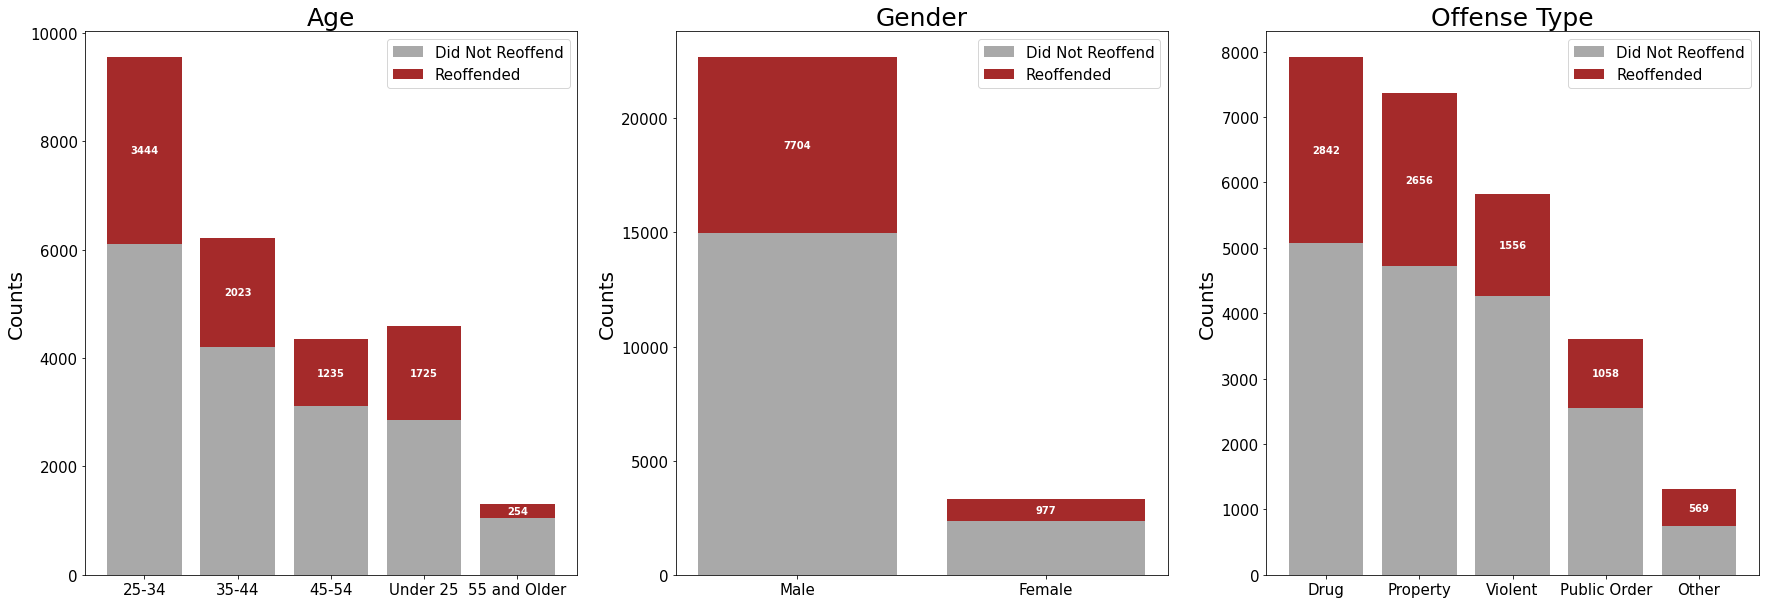

In [38]:
# Split the stacked bar charts apart 
#set up the figure size
plt.rcParams['figure.figsize'] = (30, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)

# make the data for Age to feed into the visulizer
Age_No = clean_df2.replace({'reoffend': {1: 'reoffend', 0: 'Yes'}})[clean_df2['reoffend']==1]['age'].value_counts()
Age_Yes = clean_df2.replace({'reoffend': {1: 'reoffend', 0: 'No'}})[clean_df2['reoffend']==0]['age'].value_counts()
Age_Yes = Age_Yes.reindex(index = Age_No.index)
# make the bar plot
p1 = axes[0].bar(Age_No.index, Age_No.values, color='darkgray')
p2 = axes[0].bar(Age_Yes.index, Age_Yes.values, bottom=Age_No.values, color='brown')
axes[0].set_title('Age', fontsize=25)
axes[0].set_ylabel('Counts', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].legend((p1[0], p2[0]), ('Did Not Reoffend', 'Reoffended'), fontsize = 15)
axes[0].bar_label(p2, label_type='center', color='white', weight="bold")

# make the data for Gender to feed into the visulizer
Sex_No = clean_df2.replace({'reoffend': {1: 'reoffend', 0: 'Yes'}})[clean_df2['reoffend']==1]['sex'].value_counts()
Sex_Yes = clean_df2.replace({'reoffend': {1: 'reoffend', 0: 'No'}})[clean_df2['reoffend']==0]['sex'].value_counts()
Sex_Yes = Sex_Yes.reindex(index = Sex_No.index)
# make the bar plot
p3 = axes[1].bar(Sex_No.index, Sex_No.values, color='darkgray')
p4 = axes[1].bar(Sex_Yes.index, Sex_Yes.values, bottom=Sex_No.values, color='brown')
axes[1].set_title('Gender', fontsize=25)
axes[1].set_ylabel('Counts', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].legend((p3[0], p4[0]), ('Did Not Reoffend', 'Reoffended'), fontsize = 15)
axes[1].bar_label(p4, label_type='center', color='white', weight="bold")

# make the data for Offense Type to feed into the visulizer
Offense_No = clean_df2.replace({'reoffend': {1: 'reoffend', 0: 'Yes'}})[clean_df2['reoffend']==1]['type'].value_counts()
Offense_Yes = clean_df2.replace({'reoffend': {1: 'reoffend', 0: 'No'}})[clean_df2['reoffend']==0]['type'].value_counts()
Offense_Yes = Offense_Yes.reindex(index = Offense_No.index)
# make the bar plot
p7 = axes[2].bar(Offense_No.index, Offense_No.values, color='darkgray')
p8 = axes[2].bar(Offense_Yes.index, Offense_Yes.values, bottom=Offense_No.values, color='brown')
axes[2].set_title('Offense Type', fontsize=25)
axes[2].set_ylabel('Counts', fontsize=20)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].legend((p7[0], p8[0]), ('Did Not Reoffend', 'Reoffended'), fontsize = 15)
axes[2].bar_label(p8, label_type='center', color='white', weight="bold")

plt.show()

[Text(0, 0, '5914'),
 Text(0, 0, '1866'),
 Text(0, 0, '350'),
 Text(0, 0, '388'),
 Text(0, 0, '73'),
 Text(0, 0, '4'),
 Text(0, 0, '43'),
 Text(0, 0, '5'),
 Text(0, 0, '38'),
 Text(0, 0, 'nan')]

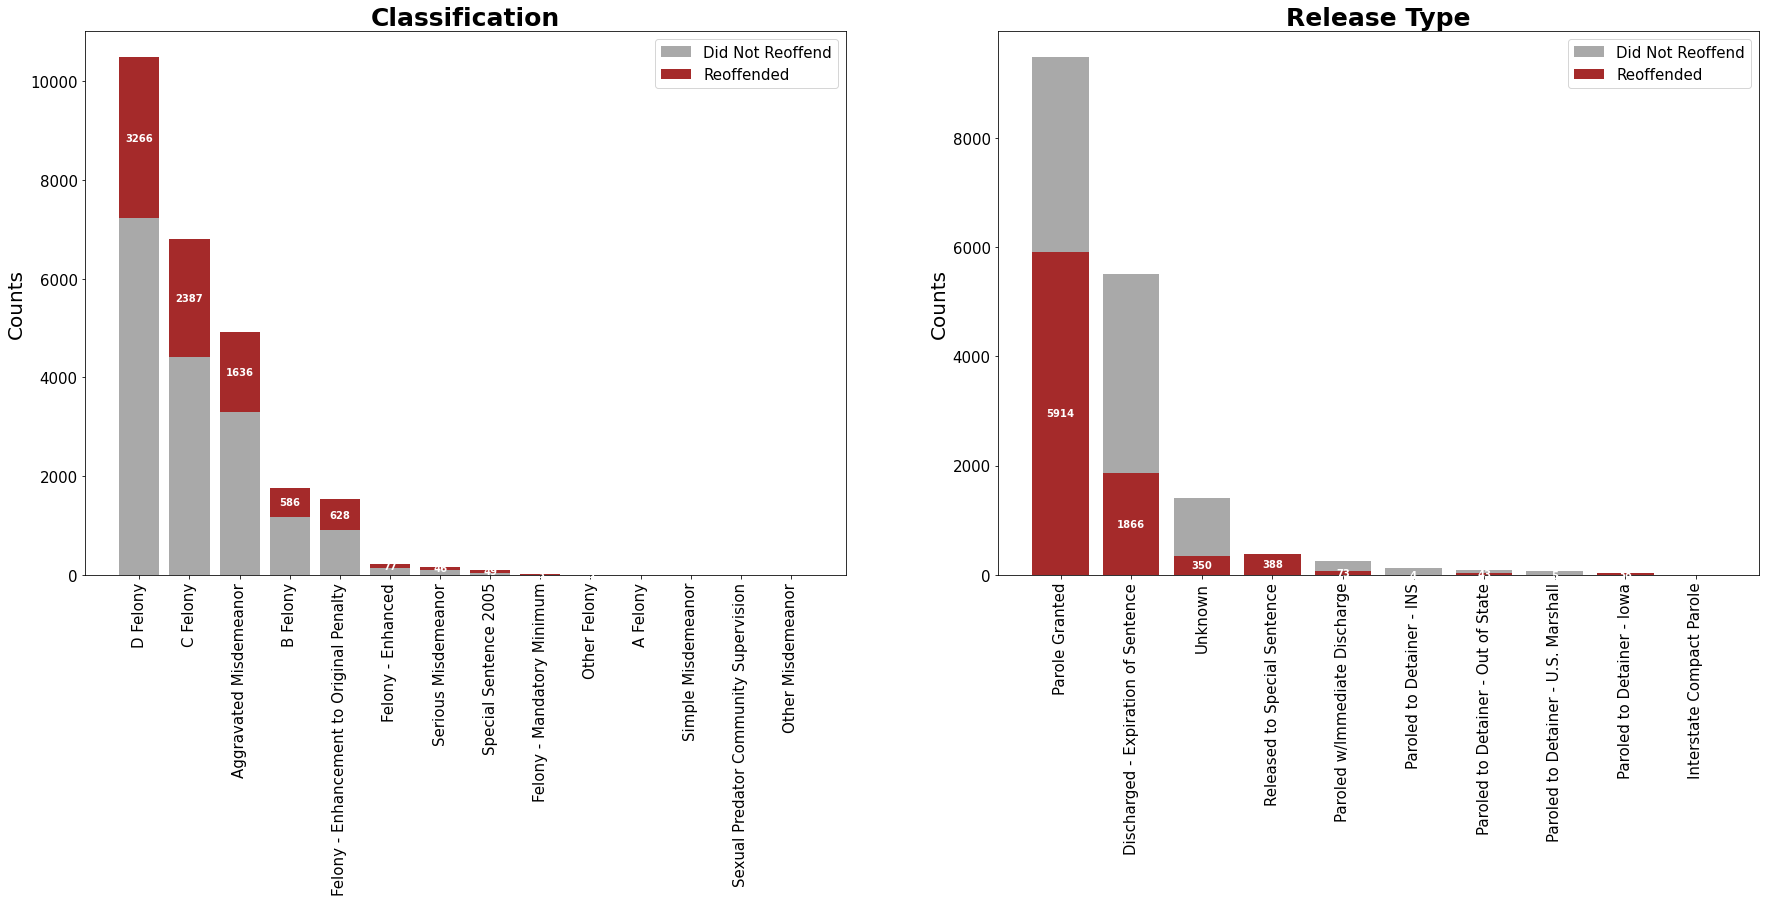

In [47]:
plt.rcParams['figure.figsize'] = (30, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# make the data for Classification to feed into the visulizer
Class_No = clean_df2.replace({'reoffend': {1: 'reoffend', 0: 'Yes'}})[clean_df2['reoffend']==1]['classification'].value_counts()
Class_Yes = clean_df2.replace({'reoffend': {1: 'reoffend', 0: 'No'}})[clean_df2['reoffend']==0]['classification'].value_counts()
Class_Yes = Class_Yes.reindex(index = Class_No.index)
# make the bar plot
p5 = axes[0].bar(Class_No.index, Class_No.values, color='darkgray')
p6 = axes[0].bar(Class_Yes.index, Class_Yes.values, bottom=Class_No.values, color='brown')
axes[0].set_title('Classification', fontsize=25, weight="bold")
axes[0].set_ylabel('Counts', fontsize=20)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].tick_params(axis='x', labelsize=15, rotation=90)
axes[0].legend((p5[0], p6[0]), ('Did Not Reoffend', 'Reoffended'), fontsize = 15, loc='upper right')
axes[0].bar_label(p6, label_type='center', color='white', weight="bold")

# make the data for Release Type to feed into the visulizer
Release_No = clean_df2.replace({'reoffend': {1: 'reoffend', 0: 'Yes'}})[clean_df2['reoffend']==1]['release'].value_counts()
Release_Yes = clean_df2.replace({'reoffend': {1: 'reoffend', 0: 'No'}})[clean_df2['reoffend']==0]['release'].value_counts()
Release_Yes = Release_Yes.reindex(index = Release_No.index)
# make the bar plot
p9 = axes[1].bar(Release_No.index, Release_No.values, color='darkgray')
p10 = axes[1].bar(Release_Yes.index, Release_Yes.values, color='brown')
axes[1].set_title('Release Type', fontsize=25, weight="bold")
axes[1].set_ylabel('Counts', fontsize=20)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15, rotation=90)
axes[1].legend((p9[0], p10[0]), ('Did Not Reoffend', 'Reoffended'), fontsize = 15, loc='upper right')
axes[1].bar_label(p10, label_type='center', color='white', weight="bold")